In [28]:
# 1️⃣ Import Libraries
import pandas as pd
import numpy as np
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier

from sklearn.metrics import (
    accuracy_score, confusion_matrix, classification_report,
    precision_score, recall_score, f1_score
)
from scipy.sparse import hstack
import seaborn as sns
import matplotlib.pyplot as plt
import joblib  # for saving model
import torch

In [29]:
df = pd.read_csv('/content/processed_phishing_urls.csv')

In [30]:
# Check for GPU
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
print(f"Using device: {device}")

Using device: cuda


In [31]:
df.head(20)

,URL,Label,text_tokenized,text_stemmed,text_sent,url_length,num_dots,num_digits,num_special_chars,num_subdirs,has_ip_address,is_https,tld,has_suspicious_words,entropy
0,nobell.it/70ffb52d079109dca5664cce6f317373782/...,malicious,"['nobell', 'it', 'ffb', 'd', 'dca', 'cce', 'f'...","['nobel', 'it', 'ffb', 'd', 'dca', 'cce', 'f',...",nobel it ffb d dca cce f login skype com en cg...,225,6,58,16,10,0,0,it,1,4.996234
1,www.dghjdgf.com/paypal.co.uk/cycgi-bin/webscrc...,malicious,"['www', 'dghjdgf', 'com', 'paypal', 'co', 'uk'...","['www', 'dghjdgf', 'com', 'paypal', 'co', 'uk'...",www dghjdgf com paypal co uk cycgi bin webscrc...,81,5,1,6,4,0,0,com,0,4.686883
2,serviciosbys.com/paypal.cgi.bin.get-into.herf....,malicious,"['serviciosbys', 'com', 'paypal', 'cgi', 'bin'...","['serviciosbi', 'com', 'paypal', 'cgi', 'bin',...",serviciosbi com paypal cgi bin get into herf s...,177,7,47,1,11,0,0,com,1,4.721044
3,mail.printakid.com/www.online.americanexpress....,malicious,"['mail', 'printakid', 'com', 'www', 'online', ...","['mail', 'printakid', 'com', 'www', 'onlin', '...",mail printakid com www onlin americanexpress c...,60,6,0,0,2,0,0,com,0,4.079842
4,thewhiskeydregs.com/wp-content/themes/widescre...,malicious,"['thewhiskeydregs', 'com', 'wp', 'content', 't...","['thewhiskeydreg', 'com', 'wp', 'content', 'th...",thewhiskeydreg com wp content theme widescreen...,116,1,21,2,10,0,0,com,0,4.413995
5,smilesvoegol.servebbs.org/voegol.php,malicious,"['smilesvoegol', 'servebbs', 'org', 'voegol', ...","['smilesvoegol', 'servebb', 'org', 'voegol', '...",smilesvoegol servebb org voegol php,36,3,0,0,1,0,0,org,0,3.607735
6,premierpaymentprocessing.com/includes/boleto-2...,malicious,"['premierpaymentprocessing', 'com', 'includes'...","['premierpaymentprocess', 'com', 'includ', 'bo...",premierpaymentprocess com includ boleto via php,61,2,7,3,2,0,0,com,0,4.481498
7,myxxxcollection.com/v1/js/jih321/bpd.com.do/do...,malicious,"['myxxxcollection', 'com', 'v', 'js', 'jih', '...","['myxxxcollect', 'com', 'v', 'js', 'jih', 'bpd...",myxxxcollect com v js jih bpd com do do l popu...,60,5,4,0,6,0,0,com,0,4.296137
8,super1000.info/docs,malicious,"['super', 'info', 'docs']","['super', 'info', 'doc']",super info doc,19,1,4,0,1,0,0,info,0,3.787144
9,horizonsgallery.com/js/bin/ssl1/_id/www.paypal...,malicious,"['horizonsgallery', 'com', 'js', 'bin', 'ssl',...","['horizonsgalleri', 'com', 'js', 'bin', 'ssl',...",horizonsgalleri com js bin ssl id www paypal c...,193,4,35,11,10,0,0,com,1,4.954346


In [32]:
df.Label.value_counts()

,count
Label,
malicious,55001
safe,48103


In [33]:
df.shape

(103104, 15)

In [34]:
df.dtypes

,0
URL,object
Label,object
text_tokenized,object
text_stemmed,object
text_sent,object
url_length,int64
num_dots,int64
num_digits,int64
num_special_chars,int64
num_subdirs,int64



⚖️ Class distribution:
 Label
malicious    55001
safe         48103
Name: count, dtype: int64


/tmp/ipython-input-374109843.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Label', data=df, palette='pastel')


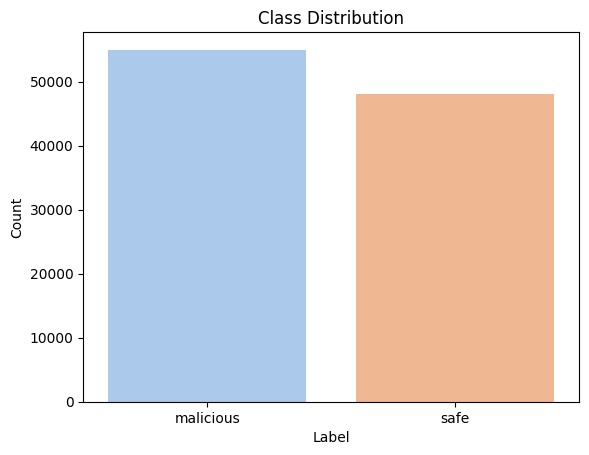

In [35]:
print("\n⚖️ Class distribution:\n", df['Label'].value_counts())
sns.countplot(x='Label', data=df, palette='pastel')
plt.title('Class Distribution')
plt.xlabel('Label')
plt.ylabel('Count')
plt.show()

In [36]:
# 4️⃣ Prepare features
cv = CountVectorizer()
X_text = cv.fit_transform(df['text_sent'].fillna(''))
# One-hot encode TLD (Top-Level Domain)
tld_encoded = pd.get_dummies(df['tld'].fillna('unknown'), prefix='tld')

numeric_features = df[['url_length', 'num_dots', 'num_digits', 'num_special_chars',
                       'num_subdirs', 'has_ip_address', 'is_https',
                       'has_suspicious_words', 'entropy']]

In [37]:
# Combine text, TLD, and numeric features
X = hstack([X_text, tld_encoded.values, numeric_features.values])
y = df['Label']

In [38]:
# Ensure labels are numeric (if strings)
if y.dtype == 'object':
    y = y.map({'malicious': 1, 'safe': 0}).fillna(y).astype(int)


In [39]:

# 5️⃣ Train-test split (with stratification)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)



In [45]:
# Model training (with class balance)
model = RandomForestClassifier(
    n_estimators=100,       # Number of trees
    max_depth=20,         # No depth limit (can tune later)
    class_weight='balanced',# Handle class imbalance
    random_state=42,
    n_jobs=-1               # Use all CPU cores
)

In [46]:
model.fit(X_train, y_train)

RandomForestClassifier(class_weight='balanced', max_depth=20, n_jobs=-1,
                       random_state=42)

In [47]:


#  Predictions
y_pred_train = model.predict(X_train)
y_pred_test = model.predict(X_test)

In [48]:
# 8️⃣ Evaluation Metrics
train_acc = accuracy_score(y_train, y_pred_train)
test_acc = accuracy_score(y_test, y_pred_test)
precision = precision_score(y_test, y_pred_test)
recall = recall_score(y_test, y_pred_test)
f1 = f1_score(y_test, y_pred_test)

In [49]:
print("\n🔹 Training Accuracy:", train_acc)
print("🔹 Testing Accuracy:", test_acc)
print("🔹 Precision:", precision)
print("🔹 Recall:", recall)
print("🔹 F1 Score:", f1)



🔹 Training Accuracy: 0.8280979110847083
🔹 Testing Accuracy: 0.8178555841132826
🔹 Precision: 0.9806263269639066
🔹 Recall: 0.6718181818181819
🔹 F1 Score: 0.7973672852826932


In [50]:

print("\nClassification Report:\n", classification_report(y_test, y_pred_test))


Classification Report:
               precision    recall  f1-score   support

           0       0.72      0.98      0.83      9621
           1       0.98      0.67      0.80     11000

    accuracy                           0.82     20621
   macro avg       0.85      0.83      0.82     20621
weighted avg       0.86      0.82      0.81     20621



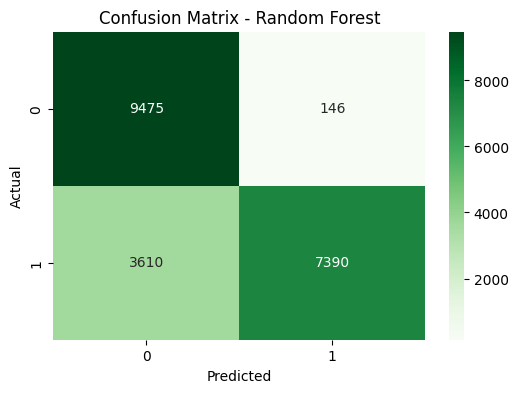

In [51]:
# 9️⃣ Confusion Matrix
cm = confusion_matrix(y_test, y_pred_test)
plt.figure(figsize=(6,4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Greens')
plt.title('Confusion Matrix - Random Forest')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()


In [53]:

# 🔟 Save Model and Vectorizer
joblib.dump(model, 'RandomForest.pkl')
joblib.dump(cv, 'countvectorizer.pkl')  # Save the vectorizer too

['countvectorizer.pkl']